In [7]:
from sympy import *
init_printing()
%matplotlib inline
y, q, c, F, M, cr, ct, bst, kq, kF, kM = symbols('y q c F M cr ct bst kq kF kM')
c = cr + y*(cr+ct)/(bst/2)
q = kq*c
LV3parms = {cr: 18, ct: 5, kq: 1, bst: 6.42*2} # in, in, lbf/in^2, in

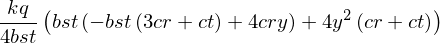

In [8]:
F = integrate(q, y) +kF
kF = solve(F.subs({y: bst/2}), kF)[0] # BC: F=0 when y=bst/2
F = integrate(q, y) +kF # plug back into F
simplify(F)

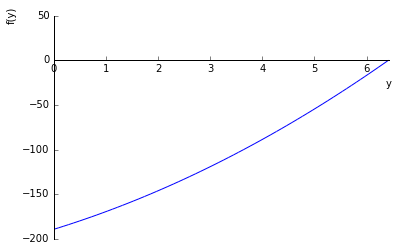

In [9]:
plot(F.subs(LV3parms), (y, 0, LV3parms[bst]/2))

In [15]:
root_shear = lambdify(y, F.subs(LV3parms))(0)
root_shear

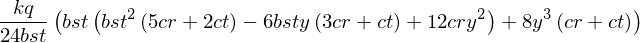

In [11]:
M = integrate(F, y) +kM
kM = solve(M.subs({y: bst/2}), kM)[0] # BC: M=0 when y=bst/2
M = integrate(F, y) +kM # plug back into M
simplify(M)

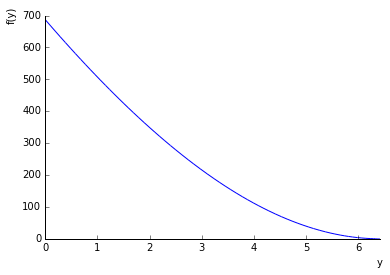

In [13]:
plot(M.subs(LV3parms), (y, 0, LV3parms[bst]/2))

In [16]:
root_bending = lambdify(y, M.subs(LV3parms))(0)
root_bending

In [17]:
root_bending/root_shear

In [73]:
# This also works, but is a bit harder to read, IMO
# y, q, c, F, M, cr, ct, bst, kq, kF, kM = symbols('y q c F M cr ct bst kq kF kM')
# c = cr + y*(cr+ct)/(bst/2)
# q = kq*c

# F = integrate(q, y)
# kF = -F.subs({y: bst/2}) # BC: F=0 when y=bst/2
# F = integrate(q, y) +kF # plug back into F

# M = integrate(F, y)
# kM = -M.subs({y: bst/2}) # BC: M=0 when y=bst/2
# M = M+kM
# M.subs(LV3parms)

In [36]:
kF = symbols('kF')
F = integrate(q, y) +kF
kF = solve(F.subs({y: bst/2}), kF)[0] # BC: F=0 when y=bst/2
F = integrate(q, y) +kF # plug back into F


cr*kq*y + kF + y**2*(cr*kq + ct*kq)/bst

In [27]:
solve(F.subs({y: bst/2}), kF)

[-bst*kq*(3*cr + ct)/4]

In [71]:
?plot

In [13]:
x, y, z = symbols('x y z')
y= x**2 +1
lambdify(x, y)(2)

In [51]:
M.subs({kM: expand(kM)})

cr*kq*y**2/2 + kF*y + kM + y**3*(cr*kq + ct*kq)/(3*bst)

In [14]:
help(lambdify)

Help on function lambdify in module sympy.utilities.lambdify:

lambdify(args, expr, modules=None, printer=None, use_imps=True, dummify=True)
    Returns a lambda function for fast calculation of numerical values.
    
    If not specified differently by the user, SymPy functions are replaced as
    far as possible by either python-math, numpy (if available) or mpmath
    functions - exactly in this order. To change this behavior, the "modules"
    argument can be used. It accepts:
    
     - the strings "math", "mpmath", "numpy", "numexpr", "sympy"
     - any modules (e.g. math)
     - dictionaries that map names of sympy functions to arbitrary functions
     - lists that contain a mix of the arguments above, with higher priority
       given to entries appearing first.
    
    The default behavior is to substitute all arguments in the provided
    expression with dummy symbols. This allows for applied functions (e.g.
    f(t)) to be supplied as arguments. Call the function with dumm

In [68]:
plot(y**2, (y, 0, LV3parms[bst]))

At this point, I basically have what I want. I just need to be able to substitute the `LV3parms` *all the way down* into `kM` and `kF`.